In [ ]:
import pandas as pd
import numpy as np


In [ ]:
df=pd.read_csv('/content/waze_dataset.csv')

In [ ]:
df.head(10)

,ID,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device
0,0,retained,283,226,296.748273,2276,208,0,2628.845068,1985.775061,28,19,Android
1,1,retained,133,107,326.896596,1225,19,64,13715.920550,3160.472914,13,11,iPhone
2,2,retained,114,95,135.522926,2651,0,0,3059.148818,1610.735904,14,8,Android
3,3,retained,49,40,67.589221,15,322,7,913.591123,587.196542,7,3,iPhone
4,4,retained,84,68,168.247020,1562,166,5,3950.202008,1219.555924,27,18,Android
5,5,retained,113,103,279.544437,2637,0,0,901.238699,439.101397,15,11,iPhone
6,6,retained,3,2,236.725314,360,185,18,5249.172828,726.577205,28,23,iPhone
7,7,retained,39,35,176.072845,2999,0,0,7892.052468,2466.981741,22,20,iPhone
8,8,retained,57,46,183.532018,424,0,26,2651.709764,1594.342984,25,20,Android
9,9,churned,84,68,244.802115,2997,72,0,6043.460295,2341.838528,7,3,iPhone


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       14999 non-null  int64  
 1   label                    14299 non-null  object 
 2   sessions                 14999 non-null  int64  
 3   drives                   14999 non-null  int64  
 4   total_sessions           14999 non-null  float64
 5   n_days_after_onboarding  14999 non-null  int64  
 6   total_navigations_fav1   14999 non-null  int64  
 7   total_navigations_fav2   14999 non-null  int64  
 8   driven_km_drives         14999 non-null  float64
 9   duration_minutes_drives  14999 non-null  float64
 10  activity_days            14999 non-null  int64  
 11  driving_days             14999 non-null  int64  
 12  device                   14999 non-null  object 
dtypes: float64(3), int64(8), object(2)
memory usage: 1.5+ MB


In [ ]:
df2=df.copy()

In [ ]:
df2 = df2.drop('ID', axis=1)

In [ ]:
df2.isnull().sum()

,0
label,700
sessions,0
drives,0
total_sessions,0
n_days_after_onboarding,0
total_navigations_fav1,0
total_navigations_fav2,0
driven_km_drives,0
duration_minutes_drives,0
activity_days,0


In [ ]:
df2.duplicated().sum()

0

In [ ]:
print(df['label'].unique())

['retained' 'churned' nan]


In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for column in df.columns:
  if df[column].dtype == object:
    df[column] = le.fit_transform(df[column])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       14999 non-null  int64  
 1   label                    14999 non-null  int64  
 2   sessions                 14999 non-null  int64  
 3   drives                   14999 non-null  int64  
 4   total_sessions           14999 non-null  float64
 5   n_days_after_onboarding  14999 non-null  int64  
 6   total_navigations_fav1   14999 non-null  int64  
 7   total_navigations_fav2   14999 non-null  int64  
 8   driven_km_drives         14999 non-null  float64
 9   duration_minutes_drives  14999 non-null  float64
 10  activity_days            14999 non-null  int64  
 11  driving_days             14999 non-null  int64  
 12  device                   14999 non-null  int64  
dtypes: float64(3), int64(10)
memory usage: 1.5 MB


In [ ]:

correlation_matrix = df.corr()
print(correlation_matrix)

                               ID     label  sessions    drives  \
ID                       1.000000 -0.006243  0.011240  0.010470   
label                   -0.006243  1.000000 -0.030624 -0.030381   
sessions                 0.011240 -0.030624  1.000000  0.996822   
drives                   0.010470 -0.030381  0.996822  1.000000   
total_sessions           0.002909 -0.012664  0.589079  0.586741   
n_days_after_onboarding -0.005673  0.100137  0.005676  0.005216   
total_navigations_fav1  -0.000606 -0.047402  0.005713  0.005017   
total_navigations_fav2  -0.000771 -0.014391  0.006185  0.007572   
driven_km_drives        -0.003561 -0.020566  0.002113  0.001883   
duration_minutes_drives -0.001594 -0.034604 -0.006113 -0.005855   
activity_days           -0.001887  0.245151  0.024194  0.024043   
driving_days            -0.001808  0.238593  0.018973  0.018847   
device                  -0.011270 -0.004374  0.012443  0.011815   

                         total_sessions  n_days_after_onboard

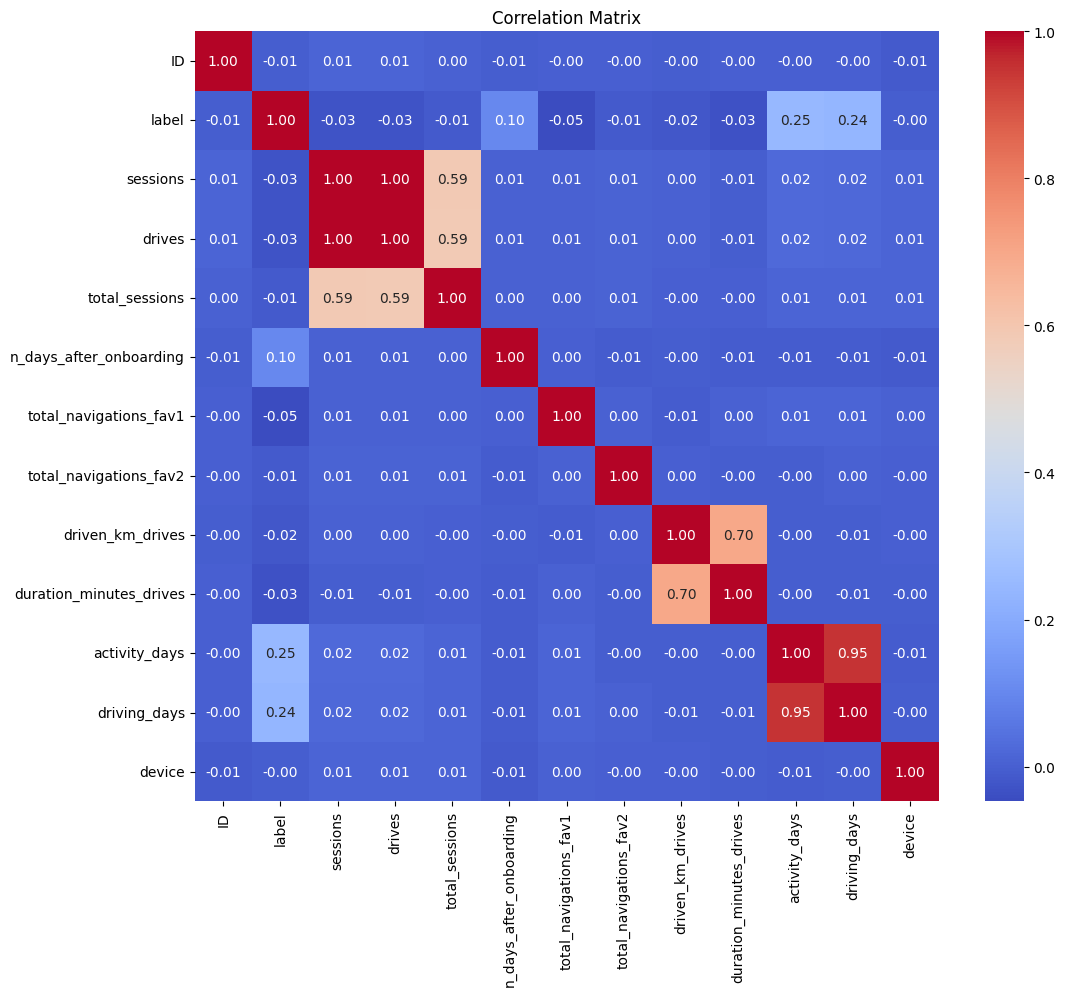

In [ ]:

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

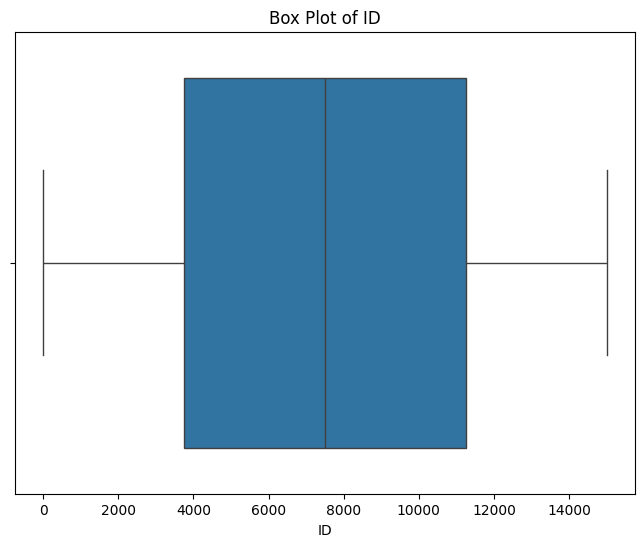

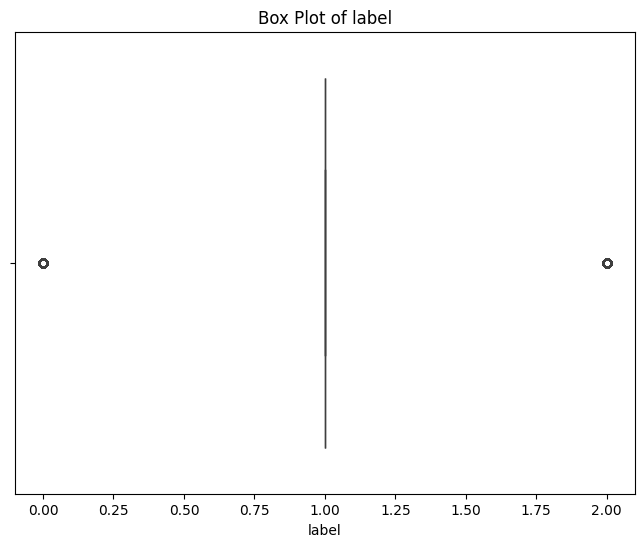

Outliers for label:
          ID  label  sessions  drives  total_sessions  \
9          9      0        84      68      244.802115   
14        14      0        72      66      401.351809   
17        17      0       272     219      564.271485   
22        22      0        73      60      118.808812   
23        23      0        29      23       33.137029   
...      ...    ...       ...     ...             ...   
14988  14988      0        13      11       41.804981   
14990  14990      0        73      61      329.904300   
14991  14991      0        50      41      102.444592   
14993  14993      2        67      57       97.570074   
14997  14997      0       149     120      180.524184   

       n_days_after_onboarding  total_navigations_fav1  \
9                         2997                      72   
14                        2524                      54   
17                          88                       0   
22                        1607                     254   
23   

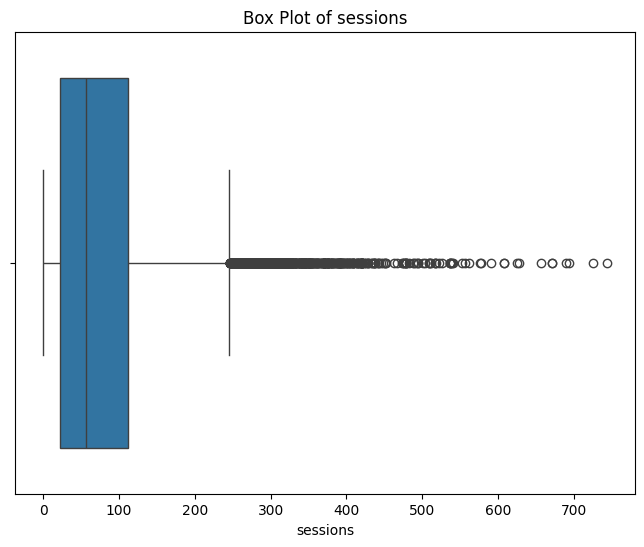

Outliers for sessions:
          ID  label  sessions  drives  total_sessions  \
0          0      1       283     226      296.748273   
17        17      0       272     219      564.271485   
33        33      1       291     233      568.722765   
63        63      1       253     203      298.673647   
71        71      1       248     200      248.311343   
...      ...    ...       ...     ...             ...   
14929  14929      1       319     257      324.308061   
14942  14942      1       299     239      446.971336   
14946  14946      1       326     261      745.443028   
14968  14968      0       333     267      623.280582   
14996  14996      1       273     219      422.017241   

       n_days_after_onboarding  total_navigations_fav1  \
0                         2276                     208   
17                          88                       0   
33                         275                      39   
63                        1546                       0   
71

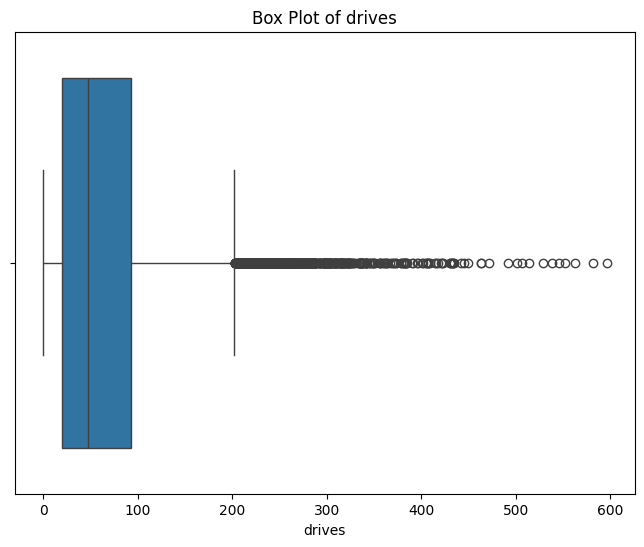

Outliers for drives:
          ID  label  sessions  drives  total_sessions  \
0          0      1       283     226      296.748273   
17        17      0       272     219      564.271485   
33        33      1       291     233      568.722765   
63        63      1       253     203      298.673647   
88        88      1       306     246      320.257531   
...      ...    ...       ...     ...             ...   
14929  14929      1       319     257      324.308061   
14942  14942      1       299     239      446.971336   
14946  14946      1       326     261      745.443028   
14968  14968      0       333     267      623.280582   
14996  14996      1       273     219      422.017241   

       n_days_after_onboarding  total_navigations_fav1  \
0                         2276                     208   
17                          88                       0   
33                         275                      39   
63                        1546                       0   
88  

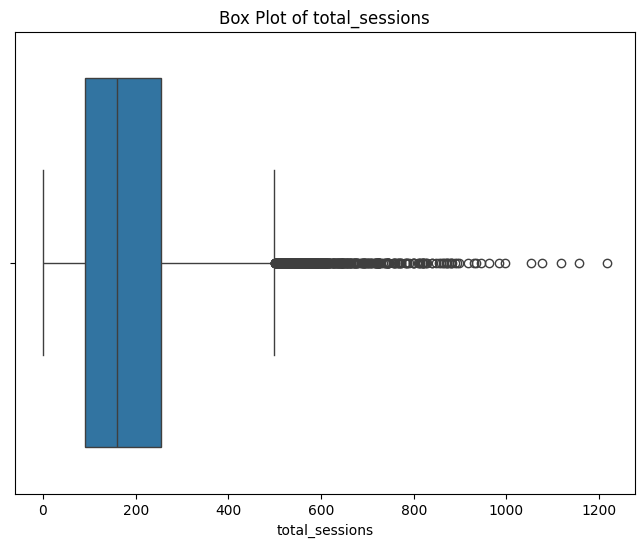

Outliers for total_sessions:
          ID  label  sessions  drives  total_sessions  \
17        17      0       272     219      564.271485   
33        33      1       291     233      568.722765   
35        35      1       156     127      780.946629   
96        96      0       305     244      638.040152   
97        97      1         0       0      559.547112   
...      ...    ...       ...     ...             ...   
14874  14874      0       539     433      551.295691   
14887  14887      1       236     189      501.005140   
14946  14946      1       326     261      745.443028   
14967  14967      1       228     188      562.902833   
14968  14968      0       333     267      623.280582   

       n_days_after_onboarding  total_navigations_fav1  \
17                          88                       0   
33                         275                      39   
35                         101                     113   
96                         400                     171

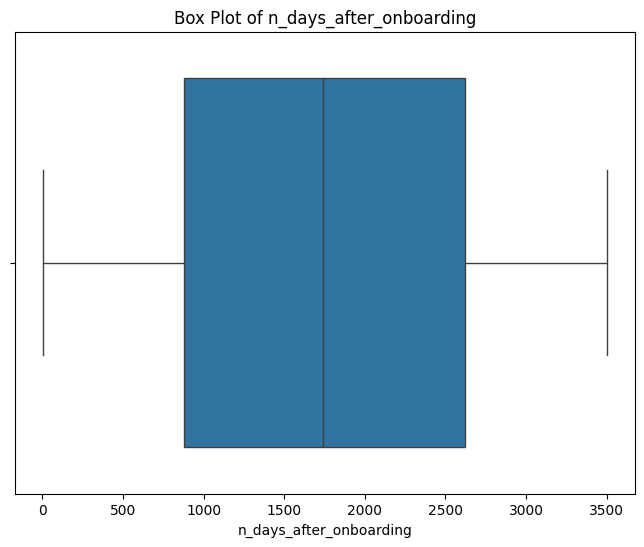

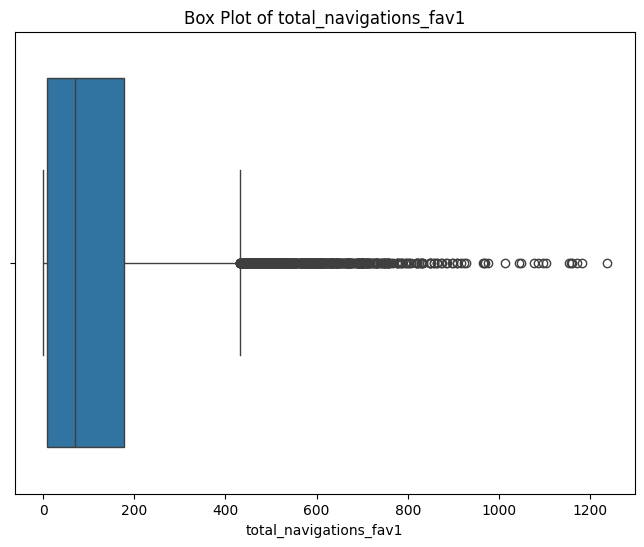

Outliers for total_navigations_fav1:
          ID  label  sessions  drives  total_sessions  \
74        74      1       142     113      324.751437   
89        89      1        35      28       71.611678   
130      130      0        39      32      176.537181   
167      167      0        64      64      296.589967   
175      175      1        55      55       81.588630   
...      ...    ...       ...     ...             ...   
14893  14893      1        66      57      282.829287   
14927  14927      1        12      10       32.945713   
14953  14953      1        69      55      254.110927   
14969  14969      0        55      44       97.107059   
14983  14983      1        48      40       50.823538   

       n_days_after_onboarding  total_navigations_fav1  \
74                        3001                     806   
89                        1987                     534   
130                        190                     610   
167                        273                

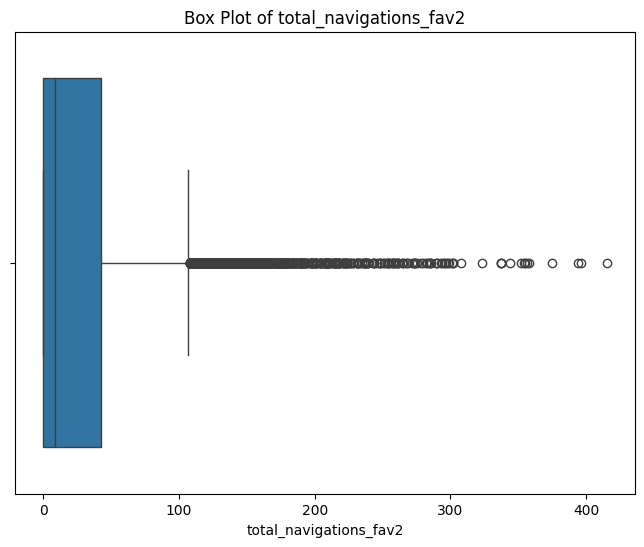

Outliers for total_navigations_fav2:
          ID  label  sessions  drives  total_sessions  \
53        53      1        84      68      123.517569   
56        56      0       150     127      187.708346   
93        93      1        52      46       58.279494   
96        96      0       305     244      638.040152   
113      113      1        91      73      168.251515   
...      ...    ...       ...     ...             ...   
14923  14923      0         7       7       73.098938   
14961  14961      1        99      81      132.953152   
14963  14963      1        11      10       17.978037   
14967  14967      1       228     188      562.902833   
14991  14991      0        50      41      102.444592   

       n_days_after_onboarding  total_navigations_fav1  \
53                        3286                      74   
56                        2028                     208   
93                         613                     223   
96                         400                

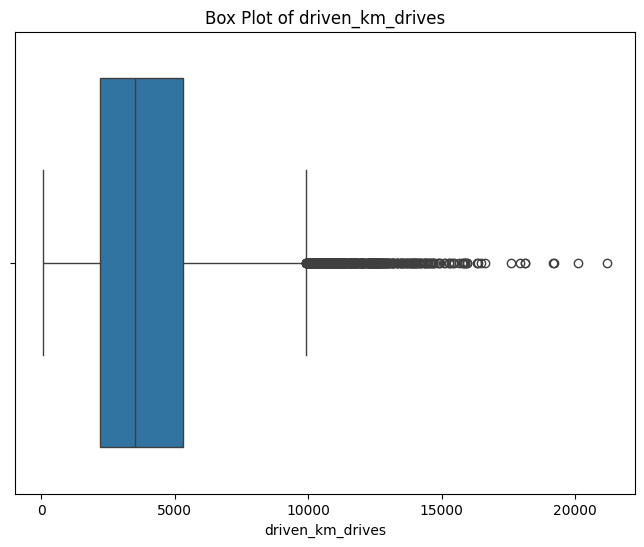

Outliers for driven_km_drives:
          ID  label  sessions  drives  total_sessions  \
1          1      1       133     107      326.896596   
30        30      1        78      66      484.571643   
48        48      0        48      42      223.252729   
59        59      1        23      20       24.464776   
62        62      1        69      56       81.665854   
...      ...    ...       ...     ...             ...   
14872  14872      0        54      54      327.221748   
14874  14874      0       539     433      551.295691   
14895  14895      1         1       1      142.095429   
14896  14896      1        89      73      192.053012   
14930  14930      1       114      92      286.801230   

       n_days_after_onboarding  total_navigations_fav1  \
1                         1225                      19   
30                        2381                     106   
48                         757                     335   
59                        1924                     1

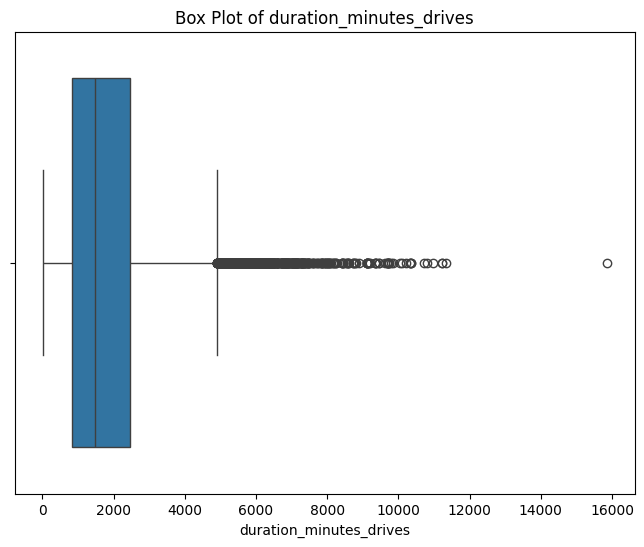

Outliers for duration_minutes_drives:
          ID  label  sessions  drives  total_sessions  \
10        10      1        23      20      117.225772   
13        13      1        80      64      132.830506   
18        18      1        48      38      259.065753   
30        30      1        78      66      484.571643   
37        37      1        16      14      103.894115   
...      ...    ...       ...     ...             ...   
14943  14943      2        48      38       96.797017   
14950  14950      1        41      36      167.241646   
14956  14956      1        42      33      226.554948   
14959  14959      1        21      18      187.529569   
14982  14982      0        17      16       46.471611   

       n_days_after_onboarding  total_navigations_fav1  \
10                        1946                       0   
13                        3154                      39   
18                        2077                     131   
30                        2381               

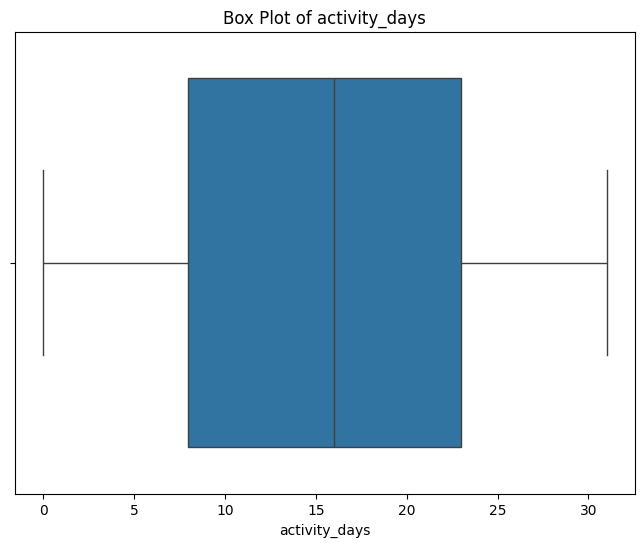

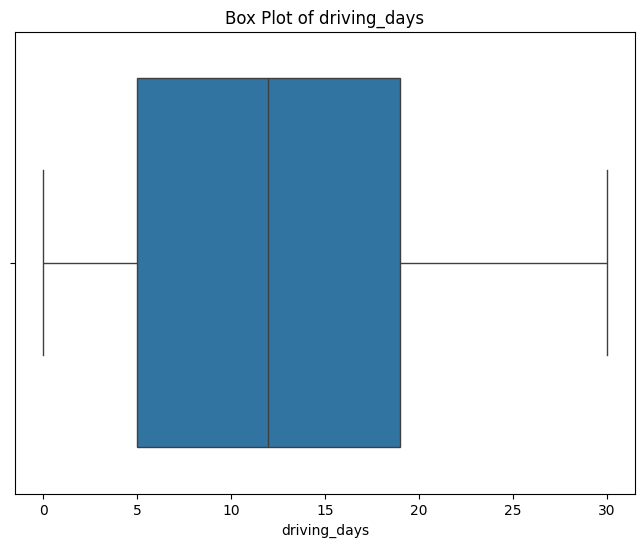

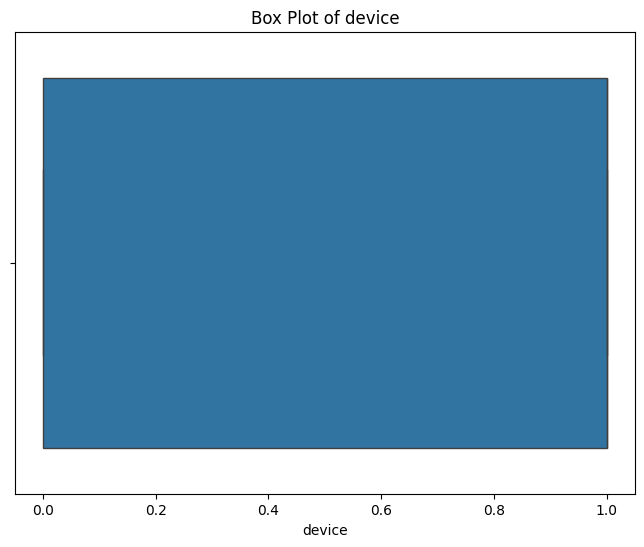

In [ ]:
for column in df.select_dtypes(include=np.number):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify outliers
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]

    # Visualize outliers using box plots
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df[column])
    plt.title(f'Box Plot of {column}')
    plt.show()

    if not outliers.empty:
        print(f"Outliers for {column}:")
        print(outliers)

In [ ]:

from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split

# Separate features and target variable
X = df.drop('label', axis=1)
y = df['label']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a KNN imputer
imputer = KNNImputer(n_neighbors=5)

# Fit and transform the training data
X_train_imputed = imputer.fit_transform(X_train)

# Transform the testing data
X_test_imputed = imputer.transform(X_test)

# Create a new DataFrame with the imputed values
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

# Ensure the 'label' column only has 0 and 1 (assuming 0 represents retained and 1 represents churned)
df_imputed['label'] = np.round(df_imputed['label']).astype(int)

# Now df_imputed contains the data with imputed values in the 'label' column

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       14999 non-null  float64
 1   sessions                 14999 non-null  float64
 2   drives                   14999 non-null  float64
 3   total_sessions           14999 non-null  float64
 4   n_days_after_onboarding  14999 non-null  float64
 5   total_navigations_fav1   14999 non-null  float64
 6   total_navigations_fav2   14999 non-null  float64
 7   driven_km_drives         14999 non-null  float64
 8   duration_minutes_drives  14999 non-null  float64
 9   activity_days            14999 non-null  float64
 10  driving_days             14999 non-null  float64
 11  device                   14999 non-null  float64
 12  label                    14999 non-null  float64
dtypes: float64(13)
memory usage: 1.5 MB


In [ ]:

# Assuming 'label' column has values 0, 1, and 2
# You want to convert it to a binary classification problem (retained/churned)
# Let's say label 0 represents retained, and labels 1 and 2 represent churned

df_imputed['label'] = df_imputed['label'].apply(lambda x: 1 if x > 0 else 0)

# Now df_imputed['label'] contains only 0 (retained) and 1 (churned)

In [ ]:

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Separate features and target variable after imputation
X = df_imputed.drop('label', axis=1)
y = df_imputed['label']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression
logreg_model = LogisticRegression()
logreg_model.fit(X_train, y_train)
logreg_y_pred = logreg_model.predict(X_test)

# Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_y_pred = rf_model.predict(X_test)

# Gradient Boosting
gb_model = GradientBoostingClassifier()
gb_model.fit(X_train, y_train)
gb_y_pred = gb_model.predict(X_test)

# Evaluate models
def evaluate_model(y_true, y_pred):
  accuracy = accuracy_score(y_true, y_pred)
  precision = precision_score(y_true, y_pred)
  recall = recall_score(y_true, y_pred)
  f1 = f1_score(y_true, y_pred)
  roc_auc = roc_auc_score(y_true, y_pred)
  return accuracy, precision, recall, f1, roc_auc

logreg_metrics = evaluate_model(y_test, logreg_y_pred)
rf_metrics = evaluate_model(y_test, rf_y_pred)
gb_metrics = evaluate_model(y_test, gb_y_pred)

# Compare models
print("Logistic Regression Metrics:")
print(f"Accuracy: {logreg_metrics[0]:.4f}, Precision: {logreg_metrics[1]:.4f}, Recall: {logreg_metrics[2]:.4f}, F1-Score: {logreg_metrics[3]:.4f}, ROC AUC: {logreg_metrics[4]:.4f}")

print("\nRandom Forest Metrics:")
print(f"Accuracy: {rf_metrics[0]:.4f}, Precision: {rf_metrics[1]:.4f}, Recall: {rf_metrics[2]:.4f}, F1-Score: {rf_metrics[3]:.4f}, ROC AUC: {rf_metrics[4]:.4f}")

print("\nGradient Boosting Metrics:")
print(f"Accuracy: {gb_metrics[0]:.4f}, Precision: {gb_metrics[1]:.4f}, Recall: {gb_metrics[2]:.4f}, F1-Score: {gb_metrics[3]:.4f}, ROC AUC: {gb_metrics[4]:.4f}")

# You can further analyze the results by plotting ROC curves or confusion matrices for a deeper understanding of the model performance.

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Metrics:
Accuracy: 0.8377, Precision: 0.8452, Recall: 0.9856, F1-Score: 0.9100, ROC AUC: 0.5427

Random Forest Metrics:
Accuracy: 0.8290, Precision: 0.8434, Recall: 0.9760, F1-Score: 0.9048, ROC AUC: 0.5359

Gradient Boosting Metrics:
Accuracy: 0.8343, Precision: 0.8423, Recall: 0.9856, F1-Score: 0.9084, ROC AUC: 0.5327


In [ ]:

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

# Separate features and target variable
X = df_imputed.drop('label', axis=1)
y = df_imputed['label']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a pipeline for oversampling and undersampling
over = SMOTE(sampling_strategy=0.5)  # Oversample minority class to 50% of majority class
under = RandomUnderSampler(sampling_strategy=0.8)  # Undersample majority class to 80% of original size
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)

# Fit and transform the training data
X_train_resampled, y_train_resampled = pipeline.fit_resample(X_train, y_train)


# Logistic Regression
logreg_model = LogisticRegression()
logreg_model.fit(X_train_resampled, y_train_resampled)
logreg_y_pred = logreg_model.predict(X_test)

# Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(X_train_resampled, y_train_resampled)
rf_y_pred = rf_model.predict(X_test)

# Gradient Boosting
gb_model = GradientBoostingClassifier()
gb_model.fit(X_train_resampled, y_train_resampled)
gb_y_pred = gb_model.predict(X_test)


# Evaluate models
def evaluate_model(y_true, y_pred):
  accuracy = accuracy_score(y_true, y_pred)
  precision = precision_score(y_true, y_pred)
  recall = recall_score(y_true, y_pred)
  f1 = f1_score(y_true, y_pred)
  roc_auc = roc_auc_score(y_true, y_pred)
  return accuracy, precision, recall, f1, roc_auc

logreg_metrics = evaluate_model(y_test, logreg_y_pred)
rf_metrics = evaluate_model(y_test, rf_y_pred)
gb_metrics = evaluate_model(y_test, gb_y_pred)

# Compare models
print("Logistic Regression Metrics:")
print(f"Accuracy: {logreg_metrics[0]:.4f}, Precision: {logreg_metrics[1]:.4f}, Recall: {logreg_metrics[2]:.4f}, F1-Score: {logreg_metrics[3]:.4f}, ROC AUC: {logreg_metrics[4]:.4f}")

print("\nRandom Forest Metrics:")
print(f"Accuracy: {rf_metrics[0]:.4f}, Precision: {rf_metrics[1]:.4f}, Recall: {rf_metrics[2]:.4f}, F1-Score: {rf_metrics[3]:.4f}, ROC AUC: {rf_metrics[4]:.4f}")

print("\nGradient Boosting Metrics:")
print(f"Accuracy: {gb_metrics[0]:.4f}, Precision: {gb_metrics[1]:.4f}, Recall: {gb_metrics[2]:.4f}, F1-Score: {gb_metrics[3]:.4f}, ROC AUC: {gb_metrics[4]:.4f}")

# You can further analyze the results by plotting ROC curves or confusion matrices for a deeper understanding of the model performance.


print("Logistic Regression Classification Report:")
print(classification_report(y_test, logreg_y_pred))

print("\nRandom Forest Classification Report:")
print(classification_report(y_test, rf_y_pred))

print("\nGradient Boosting Classification Report:")
print(classification_report(y_test, gb_y_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Metrics:
Accuracy: 0.7217, Precision: 0.8947, Recall: 0.7547, F1-Score: 0.8188, ROC AUC: 0.6558

Random Forest Metrics:
Accuracy: 0.7623, Precision: 0.8715, Recall: 0.8383, F1-Score: 0.8546, ROC AUC: 0.6108

Gradient Boosting Metrics:
Accuracy: 0.7653, Precision: 0.8776, Recall: 0.8347, F1-Score: 0.8556, ROC AUC: 0.6269
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.31      0.56      0.40       501
           1       0.89      0.75      0.82      2499

    accuracy                           0.72      3000
   macro avg       0.60      0.66      0.61      3000
weighted avg       0.80      0.72      0.75      3000


Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.32      0.38      0.35       501
           1       0.87      0.84      0.85      2499

    accuracy                           0.76      3000
   macro avg       0.60      0.6

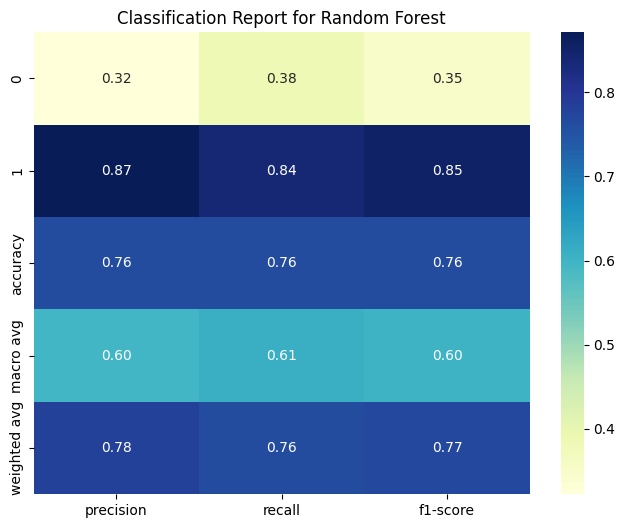

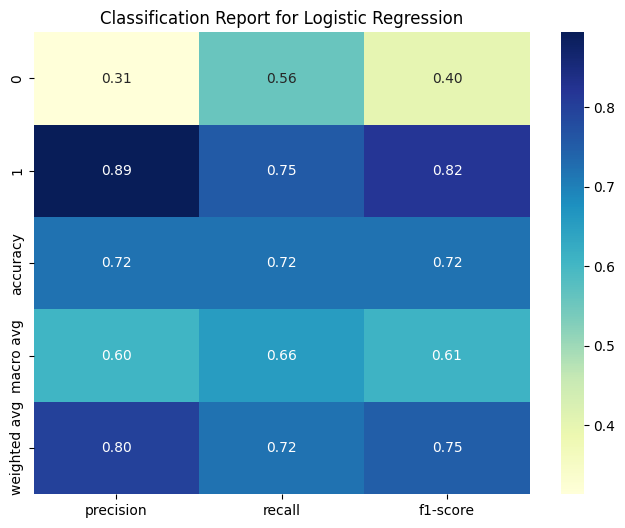

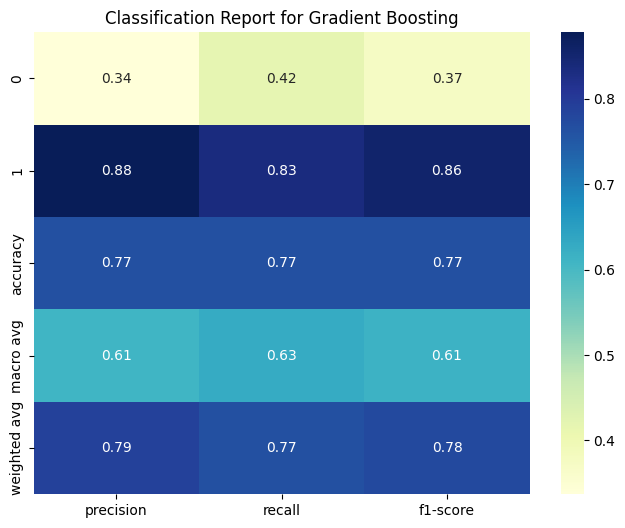

In [ ]:

class_counts = df_imputed['label'].value_counts()

# Create a bar plot to visualize the class distribution
plt.figure(figsize=(8, 6))
plt.bar(class_counts.index, class_counts.values)
plt.xlabel('Class')
plt.ylabel('Number of Data Points')
plt.title('Class Distribution in the Dataset')
plt.show()